In [31]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('source/FReDA4.csv')

In [33]:
def val_to_category(val):
    if val <= 0.3:
        return 0
    elif 0.3 < val <= 1.5:
        return 1
    elif 1.5 < val <= 2.5:
        return 2
    elif 2.5 < val <= 3.5:
        return 3
    elif 3.5 < val <= 4.5:
        return 4
    elif 4.5 < val:
        return 5
    return None

In [34]:
# Satisfied
df.loc[df['Group3'] == 'Couple Satisfaction', 'Group4'] = 'Couple Satisfaction'

# Deprived groups
# df.loc[df['Group3'] == 'Couple Deprivation', 'Group4'] = 'Couple Deprivation'
df.loc[df['Group2'] == 'One-sided Deprivation', 'Group4'] = 'Deprived_One'
df.loc[df['Group1'] == 'SubGroup3', 'Group4'] = 'Deprived_Both'
#
# Saturated groups
# df.loc[df['Group3'] == 'Couple Saturation', 'Group4'] = 'Couple Saturation'
df.loc[df['Group2'] == 'One-sided Saturation', 'Group4'] = 'Saturated_One'
df.loc[df['Group1'] == 'SubGroup6', 'Group4'] = 'Saturated_Both'

df.loc[df['Group3'] == 'Couple Mixed', 'Group4'] = 'Couple Mixed'

In [35]:
df['Freq'] = df['Frequency'].apply(val_to_category)
df['Des'] = df['Desire'].apply(val_to_category)

df.groupby(['Group4'])[['Des']].value_counts()

Group4               Des
Couple Mixed         3       194
                     2       144
                     1       125
                     4       106
                     5        53
                     0        38
Couple Satisfaction  4      1200
                     3       996
                     5       806
                     2       557
                     1       269
                     0        14
Deprived_Both        3      1186
                     2       849
                     4       809
                     5       296
                     1       262
Deprived_One         3      1490
                     4      1288
                     2      1041
                     5       576
                     1       518
                     0        27
Saturated_Both       1        25
                     3        21
                     2        17
                     0        16
                     4         9
                     5         2
Saturated_One     

In [36]:
totals = df.groupby('Group4').size()

In [37]:
# frequencies = (
#     df
#     .groupby(['Group4', 'Freq'])
#     .size()
#     .unstack(fill_value=0)
#     .pipe(lambda x: x.div(x.sum(axis=1), axis=0) * 100)
#     .stack()
#     .rename('percent')
#     .reset_index()
# )
# 1. Get raw counts first
counts = df.groupby(['Group4', 'Freq']).size().unstack(fill_value=0)

# 2. Calculate percentages
percents = counts.div(counts.sum(axis=1), axis=0) * 100

# 3. Combine them and reset index
frequencies = (
    pd.concat({'count': counts, 'percent': percents}, axis=1)
    .stack(level=1)           # Bring 'Freq' back to rows
    .reset_index()
)
frequencies['Combined'] = (
    frequencies['count'].astype(str) +
    " (" + frequencies['percent'].round(2).astype(str) + "%)"
)

# 2. Pivot the data so Groups are rows and Freq categories are columns
final_table1 = frequencies.pivot(
    index='Group4',
    columns='Freq',
    values='Combined'
)

In [38]:
# desires = (
#     df
#     .groupby(['Group4', 'Des'])
#     .size()
#     .unstack(fill_value=0)
#     .pipe(lambda x: x.div(x.sum(axis=1), axis=0) * 100)
#     .stack()
#     .rename('percent')
#     .reset_index()
# )
# 1. Get raw counts first
counts = df.groupby(['Group4', 'Des']).size().unstack(fill_value=0)

# 2. Calculate percentages
percents = counts.div(counts.sum(axis=1), axis=0) * 100

# 3. Combine them and reset index
desires = (
    pd.concat({'count': counts, 'percent': percents}, axis=1)
    .stack(level=1)           # Bring 'Freq' back to rows
    .reset_index()
)
desires['Combined'] = (
    desires['count'].astype(str) +
    " (" + desires['percent'].round(2).astype(str) + "%)"
)

# 2. Pivot the data so Groups are rows and Freq categories are columns
final_table2 = desires.pivot(
    index='Group4',
    columns='Des',
    values='Combined'
)

In [39]:
# props = (
#     df.groupby('Group4')['Des']
#       .value_counts(normalize=True)*100
# )

In [40]:
# TODO:
# 1. COUNT TOTAL FOR EACH GROUP
# 2. CALCULATE %
# 3. PLOT FREQUENCY AND DESIRE PERO GROUP (9)

In [41]:

# import seaborn as sns
# import matplotlib.pyplot as plt
#
# sns.stripplot(
#     data=frequencies,
#     x='Freq',
#     y='percent',
#     hue='Group4',
#     jitter=0.25,
#     size=6,
#     alpha=0.7
# )
#
# plt.ylabel('%')
# plt.show()

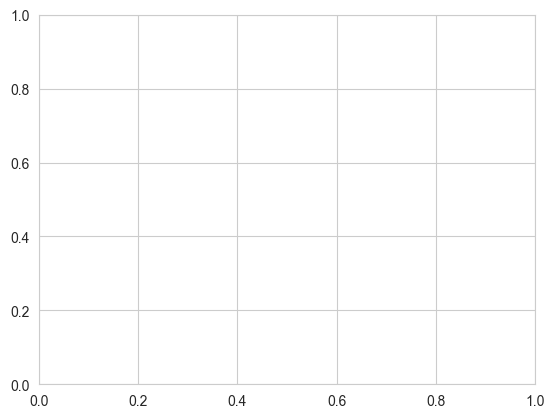

In [42]:

freq_df =  frequencies[frequencies['Group4'] == 'Deprived_Couples']
des_df =  desires[desires['Group4'] == 'Deprived_Couples']

ax = sns.stripplot(
    data=freq_df,
    x='Freq',
    y='percent',
    hue='Group4',
    jitter=0.25,
    size=6,
    alpha=0.6,
    dodge=True
)
line_data = (
    freq_df
    .groupby(['Group4', 'Freq'])['percent']
    .mean()
    .reset_index()
)


from scipy.interpolate import make_interp_spline

for g, gdf in line_data.groupby('Group4'):
    gdf = gdf.sort_values('Freq')

    x = gdf['Freq'].to_numpy()
    y = gdf['percent'].to_numpy()

    x_smooth = np.linspace(x.min(), x.max(), 200)
    spline = make_interp_spline(x, y, k=3)
    y_smooth = spline(x_smooth)

    ax.plot(x_smooth, y_smooth, linewidth=2, alpha=0.9)
    ax.fill_between(x_smooth, y_smooth, alpha=0.15)

ax = sns.stripplot(
    data=des_df,
    x='Des',
    y='percent',
    hue='Group4',
    jitter=0.25,
    size=6,
    alpha=0.6,
    dodge=True
)
line_data = (
    des_df
    .groupby(['Group4', 'Des'])['percent']
    .mean()
    .reset_index()
)

for g, gdf in line_data.groupby('Group4'):
    gdf = gdf.sort_values('Des')

    x = gdf['Des'].to_numpy()
    y = gdf['percent'].to_numpy()

    x_smooth = np.linspace(x.min(), x.max(), 200)
    spline = make_interp_spline(x, y, k=3)
    y_smooth = spline(x_smooth)

    ax.plot(x_smooth, y_smooth, linewidth=2, alpha=0.9)
    ax.fill_between(x_smooth, y_smooth, alpha=0.15)

plt.legend().remove()

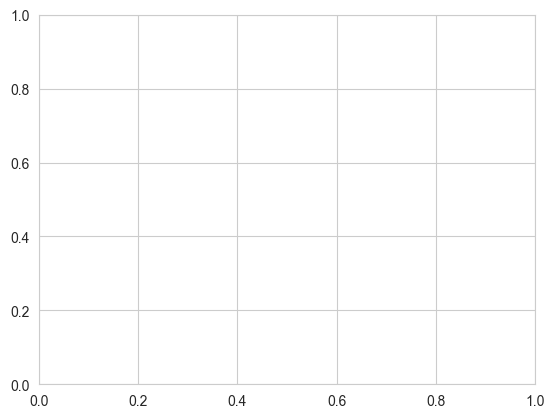

In [43]:
freq_df =  frequencies[frequencies['Group4'] == 'Saturated_Couples']
des_df =  desires[desires['Group4'] == 'Saturated_Couples']

ax = sns.stripplot(
    data=freq_df,
    x='Freq',
    y='percent',
    hue='Group4',
    jitter=0.25,
    size=6,
    alpha=0.6,
    dodge=True
)
line_data = (
    freq_df
    .groupby(['Group4', 'Freq'])['percent']
    .mean()
    .reset_index()
)


from scipy.interpolate import make_interp_spline

for g, gdf in line_data.groupby('Group4'):
    gdf = gdf.sort_values('Freq')

    x = gdf['Freq'].to_numpy()
    y = gdf['percent'].to_numpy()

    x_smooth = np.linspace(x.min(), x.max(), 200)
    spline = make_interp_spline(x, y, k=3)
    y_smooth = spline(x_smooth)

    ax.plot(x_smooth, y_smooth, linewidth=2, alpha=0.9)
    ax.fill_between(x_smooth, y_smooth, alpha=0.15)

ax = sns.stripplot(
    data=des_df,
    x='Des',
    y='percent',
    hue='Group4',
    jitter=0.25,
    size=6,
    alpha=0.6,
    dodge=True
)
line_data = (
    des_df
    .groupby(['Group4', 'Des'])['percent']
    .mean()
    .reset_index()
)

for g, gdf in line_data.groupby('Group4'):
    gdf = gdf.sort_values('Des')

    x = gdf['Des'].to_numpy()
    y = gdf['percent'].to_numpy()

    x_smooth = np.linspace(x.min(), x.max(), 200)
    spline = make_interp_spline(x, y, k=3)
    y_smooth = spline(x_smooth)

    ax.plot(x_smooth, y_smooth, linewidth=2, alpha=0.9)
    ax.fill_between(x_smooth, y_smooth, alpha=0.15)

plt.legend().remove()

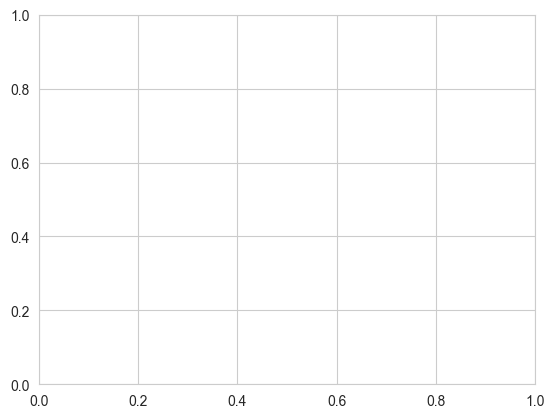

In [44]:
freq_df =  frequencies[frequencies['Group4'] == 'Mixed_Couples'].reset_index(drop=True)
des_df =  desires[desires['Group4'] == 'Mixed_Couples'].reset_index(drop=True)

# freq_df.loc[-1] = {"Group4":"Mixed_Couples", "Freq": 6, "percent": 0}
# freq_df.loc[6] = {"Group4":"Mixed_Couples", "Freq": 6, "percent": 0}

ax = sns.stripplot(
    data=freq_df,
    x='Freq',
    y='percent',
    hue='Group4',
    jitter=0.25,
    size=6,
    alpha=0.6,
    dodge=True
)
line_data = (
    freq_df
    .groupby(['Group4', 'Freq'])['percent']
    .mean()
    .reset_index()
)


from scipy.interpolate import make_interp_spline

for g, gdf in line_data.groupby('Group4'):
    gdf = gdf.sort_values('Freq')

    x = gdf['Freq'].to_numpy()
    y = gdf['percent'].to_numpy()

    x_smooth = np.linspace(x.min(), x.max(), 200)
    spline = make_interp_spline(x, y, k=3)
    y_smooth = spline(x_smooth)

    ax.plot(x_smooth, y_smooth, linewidth=2, alpha=0.9)
    ax.fill_between(x_smooth, y_smooth, alpha=0.15)

ax = sns.stripplot(
    data=des_df,
    x='Des',
    y='percent',
    hue='Group4',
    jitter=0.25,
    size=6,
    alpha=0.6,
    dodge=True
)
line_data = (
    des_df
    .groupby(['Group4', 'Des'])['percent']
    .mean()
    .reset_index()
)

for g, gdf in line_data.groupby('Group4'):
    gdf = gdf.sort_values('Des')

    x = gdf['Des'].to_numpy()
    y = gdf['percent'].to_numpy()

    x_smooth = np.linspace(x.min(), x.max(), 200)
    spline = make_interp_spline(x, y, k=3)
    y_smooth = spline(x_smooth)

    ax.plot(x_smooth, y_smooth, linewidth=2, alpha=0.9)
    ax.fill_between(x_smooth, y_smooth, alpha=0.15)

plt.legend().remove()